<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown
url = 'https://drive.google.com/u/0/uc?id=1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB&export=download'
# output = 'cat_dog_data.zip' # download colab
output = '/content/drive/MyDrive/Colab Notebooks/cat_dog_data.zip' # download drive
gdown.download(url, output, quiet=False)

# !unzip -oq 'cell_images.zip' -d '/content' # unzip from colab to colab content
# !unzip -oq $output # unzip from $output == 'cell_images.zip' in colab content

Downloading...
From: https://drive.google.com/u/0/uc?id=1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB&export=download
To: /content/drive/MyDrive/Colab Notebooks/cat_dog_data.zip
100%|██████████| 595M/595M [00:09<00:00, 61.8MB/s]


'/content/drive/MyDrive/Colab Notebooks/cat_dog_data.zip'

In [ ]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Data/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [ ]:
my_data_dir ="data"

In [ ]:
os.listdir(my_data_dir)

['validation', 'train', 'test']

In [ ]:
test_path = my_data_dir + "/test/"
train_path = my_data_dir + "/train/"
validation_path = my_data_dir + "/validation/"

In [ ]:
os.listdir(test_path)

['4732.jpg',
 '6291.jpg',
 '4702.jpg',
 '11698.jpg',
 '4391.jpg',
 '4554.jpg',
 '5340.jpg',
 '3262.jpg',
 '5058.jpg',
 '12311.jpg',
 '12189.jpg',
 '11668.jpg',
 '5595.jpg',
 '12106.jpg',
 '6592.jpg',
 '11057.jpg',
 '3975.jpg',
 '4205.jpg',
 '4611.jpg',
 '4807.jpg',
 '2966.jpg',
 '3786.jpg',
 '10601.jpg',
 '11572.jpg',
 '6916.jpg',
 '10424.jpg',
 '5031.jpg',
 '10015.jpg',
 '5536.jpg',
 '5371.jpg',
 '4640.jpg',
 '12462.jpg',
 '10191.jpg',
 '10670.jpg',
 '4399.jpg',
 '12459.jpg',
 '6971.jpg',
 '4625.jpg',
 '4387.jpg',
 '12273.jpg',
 '10656.jpg',
 '5170.jpg',
 '5075.jpg',
 '12344.jpg',
 '3001.jpg',
 '5949.jpg',
 '5438.jpg',
 '5693.jpg',
 '5062.jpg',
 '5382.jpg',
 '6923.jpg',
 '11917.jpg',
 '7029.jpg',
 '4189.jpg',
 '4159.jpg',
 '11340.jpg',
 '7060.jpg',
 '11250.jpg',
 '10178.jpg',
 '4207.jpg',
 '3163.jpg',
 '11381.jpg',
 '10791.jpg',
 '3445.jpg',
 '6448.jpg',
 '12118.jpg',
 '11089.jpg',
 '4254.jpg',
 '3783.jpg',
 '6187.jpg',
 '10741.jpg',
 '4687.jpg',
 '11451.jpg',
 '3943.jpg',
 '3488.jpg'

In [ ]:
os.listdir(train_path)

['dog', 'cat']

In [ ]:
classes = os.listdir(train_path)
classes

['dog', 'cat']

**Let's check how many images there are.**

In [ ]:
len(os.listdir(train_path + "cat")), len(os.listdir(train_path + "dog"))

(12500, 5026)

In [ ]:
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/validation'.
There are 0 directories and 1071 images in 'data/validation/dog'.
There are 0 directories and 1219 images in 'data/validation/cat'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 5026 images in 'data/train/dog'.
There are 0 directories and 12500 images in 'data/train/cat'.
There are 0 directories and 6897 images in 'data/test'.


**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [ ]:
os.listdir(train_path + "cat")[:10]

['cat.11796.jpg',
 'cat.11440.jpg',
 'cat.11868.jpg',
 'cat.3340.jpg',
 'cat.12282.jpg',
 'cat.8613.jpg',
 'cat.529.jpg',
 'cat.9723.jpg',
 'cat.10807.jpg',
 'cat.10256.jpg']

In [ ]:
os.listdir(train_path + "cat")[12]

'cat.364.jpg'

In [ ]:
cat_path = train_path + "cat" + "/cat.1594.jpg"
cat_path

'data/train/cat/cat.1594.jpg'

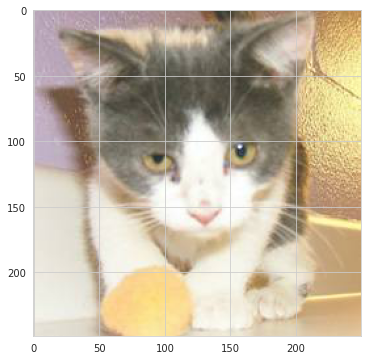

In [ ]:
cat = imread(cat_path)
plt.imshow(cat)

In [ ]:
cat.shape

(249, 250, 3)

In [ ]:
os.listdir(train_path + "dog")[:10]

['dog.10635.jpg',
 'dog.10965.jpg',
 'dog.12449.jpg',
 'dog.11289.jpg',
 'dog.1072.jpg',
 'dog.11467.jpg',
 'dog.11046.jpg',
 'dog.11236.jpg',
 'dog.12261.jpg',
 'dog.1995.jpg']

In [ ]:
os.listdir(train_path + "dog")[12]

'dog.10683.jpg'

In [ ]:
dog_path = train_path + "dog" + "/dog.2395.jpg"
dog_path

'data/train/dog/dog.2395.jpg'

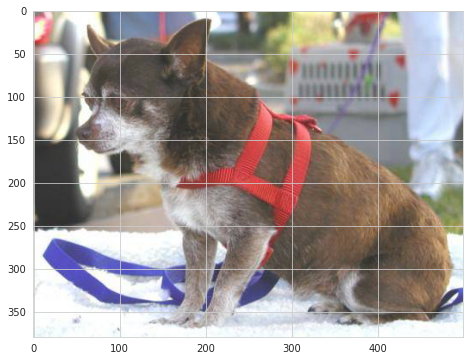

In [ ]:
dog = imread(dog_path)
plt.imshow(dog)

In [ ]:
dog.shape


(379, 499, 3)

In [ ]:
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}")
  return img

Image shape : (283, 499, 3)


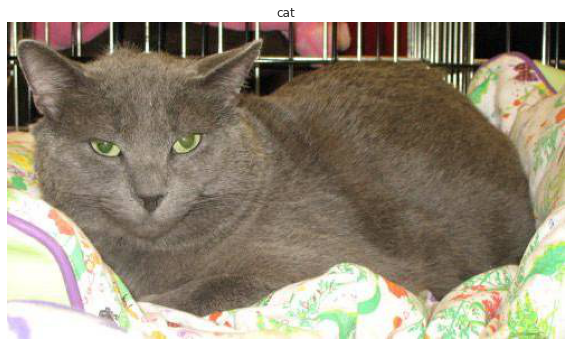

In [ ]:
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(classes))

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [ ]:
cat.shape

(249, 250, 3)

In [ ]:
dog.shape
# Cat ve dog shape'leri farklı...

(379, 499, 3)

In [ ]:
cat_x = [imread(train_path + "cat/" + image).shape[0] for image in os.listdir(train_path + "cat")]
cat_y = [imread(train_path + "cat/" + image).shape[1] for image in os.listdir(train_path + "cat")]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


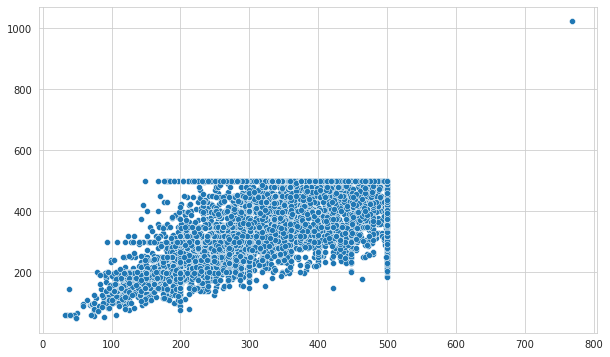

In [ ]:
sns.scatterplot(cat_x, cat_y);

In [ ]:
np.mean(cat_x), np.median(cat_x)

(356.46712, 374.0)

In [ ]:
np.mean(cat_y), np.median(cat_y)

(410.52264, 470.0)

In [ ]:
image_shape = (374, 470, 3)

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [ ]:
cat.max()

255

In [ ]:
cat.min()

24

In [ ]:
dog.max()

255

In [ ]:
dog.min()

28

In [ ]:
for i in os.listdir(train_path+'cat'):
  cat_path = train_path+"cat/"+i
  cat = imread(cat_path)
  cat = cat/255
  

In [ ]:
cat.max(), cat.min()

(1.0, 0.0)

In [ ]:
for i in os.listdir(train_path+'cat'):
  cat_path = train_path+"cat/"+i
  cat = imread(cat_path)
  cat = cat/255
  

In [ ]:
cat.max(), cat.min()

(1.0, 0.0)

In [ ]:
for i in os.listdir(test_path):
  path = test_path+"/"+i
  img = imread(path)
  img = img/255
  

In [ ]:
img.max(), img.min()

(1.0, 0.0)

In [ ]:
for i in os.listdir(validation_path+'dog'):
  dog_path = validation_path+"dog/"+i
  dog = imread(dog_path)
  dog = dog/255
  

In [ ]:
dog.max(), dog.min()

(1.0, 0.0)

In [ ]:
for i in os.listdir(validation_path+'cat'):
  cat_path = validation_path+"cat/"+i
  cat = imread(cat_path)
  cat = cat/255
  

In [ ]:
cat.max(), cat.min()

(1.0, 0.0)

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               #rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode="nearest")

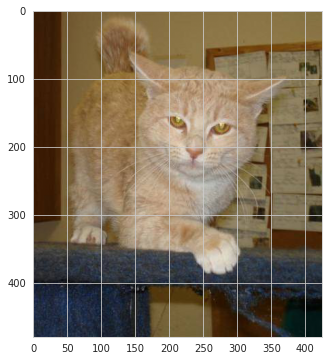

In [ ]:
plt.imshow(cat)

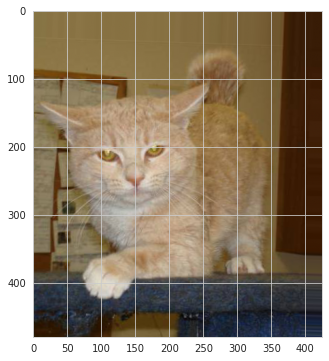

In [ ]:
plt.imshow(image_gen.random_transform(cat))

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [ ]:
#help(image_gen.flow_from_directory)

In [ ]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


In [ ]:
batch_size = 32

In [ ]:

image_shape

(374, 470, 3)

In [ ]:
image_shape[:2]

(374, 470)

In [ ]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode="rgb",
                                                batch_size=batch_size,
                                                class_mode="binary",
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(directory=validation_path,
                                                target_size=image_shape[:2],
                                                color_mode="rgb",
                                                batch_size=batch_size,
                                                class_mode="binary",
                                                shuffle=True)

Found 2290 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
test_image_gen.class_indices

{'cat': 0, 'dog': 1}

# Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation("relu"))

model1.add(Dropout(0.2))

model1.add(Dense(1))
model1.add(Activation("sigmoid"))

model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 372, 468, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 186, 234, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 184, 232, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 92, 116, 64)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 114, 64)       36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 57, 64)      

In [ ]:
early_stop = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

In [ ]:
model1.fit(train_image_gen,
           epochs=10,
           steps_per_epoch=len(train_image_gen),
           validation_data=test_image_gen,
           validation_steps=len(test_image_gen),
           callbacks=[early_stop])

Epoch 1/10
355/548 [==================>...........] - ETA: 32:34 - loss: 7.4580 - accuracy: 0.7071

# Evaluation on Test Data

# Prediction